In [13]:
import nltk
import pickle
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from  sklearn.decomposition import NMF
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as PathEffects
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from stop_words import get_stop_words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from sklearn.preprocessing import normalize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yefeng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
with open('filtered_sent_lemm.pkl' , 'rb') as picklefile: 
    df = pickle.load(picklefile)

In [16]:
# create a function to print top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [19]:
nltk_stpwd = stopwords.words('english')
stop_words_stpwd = get_stop_words('en')
merged_stopwords = list(set(nltk_stpwd + stop_words_stpwd))
merged_stopwords = merged_stopwords + ['nice','great','year','time','good','friendly', 'deer', 'valley', 'resort',
                                      'fun','day','ticket', 'park', 'city', 'place', 'ski', 'skiing','skier','slope',
                                      'zermatt','matterhorn','cable', 'creek', 'beaver','best','one','run','aspen',
                                      'take','let']

In [21]:
# TFIDF
vectorizer = TfidfVectorizer(
                         stop_words=merged_stopwords, 
                         token_pattern="\\b[a-z][a-z]+\\b", 
                         min_df=35,
                         max_df=0.7
                        )
counts = vectorizer.fit_transform(df['lem_sent_text'])
feature_names = vectorizer.get_feature_names()

# NMF
components_count = 20

model = NMF(n_components=components_count, init='random', max_iter=1000, random_state=101)
topic_distr = model.fit_transform(counts)

In [22]:
print_top_words(model, feature_names, 10)

# Topic:
# beginner:6
# food: 15
# family: 19
# crowded: 0
# liftspeed: 1
# waittime: 2
# groom: 18
# powder: 17
# staff: 14
# terrain: 7


Topic #0: get, crowd, hour, easy, away, minute, top, way, pay, early
Topic #1: lift, slow, high, speed, chair, top, open, operator, fast, quad
Topic #2: line, long, wait, short, minute, never, crowd, weekend, bottom, even
Topic #3: love, kid, come, brule, every, much, mt, powder, absolutely, still
Topic #4: first, make, season, experience, last, trip, pas, overall, weekend, bad
Topic #5: lot, parking, powder, tree, variety, big, steep, town, also, shuttle
Topic #6: beginner, kid, intermediate, learn, hill, school, advanced, lesson, expert, instructor
Topic #7: terrain, variety, expert, steep, awesome, advanced, challenge, much, level, intermediate
Topic #8: trail, open, black, blue, groom, steep, green, many, diamond, long
Topic #9: mountain, big, top, small, overall, favorite, blue, local, whole, side
Topic #10: like, look, feel, seem, say, see, much, thing, big, steep
Topic #11: back, come, definitely, wait, never, next, ca, keep, side, bowl
Topic #12: people, really, many, enjoy, wo

In [23]:
resort_top = np.argmax(topic_distr, axis=1)
np.bincount(resort_top)

array([13930,  8658,  5905,  2996, 26457,  3352,  7315,  5684,  5529,
        5399,  4816,  3727,  4769,  5367,  2917,  3854,  8893,  5639,
        2968,  2947])

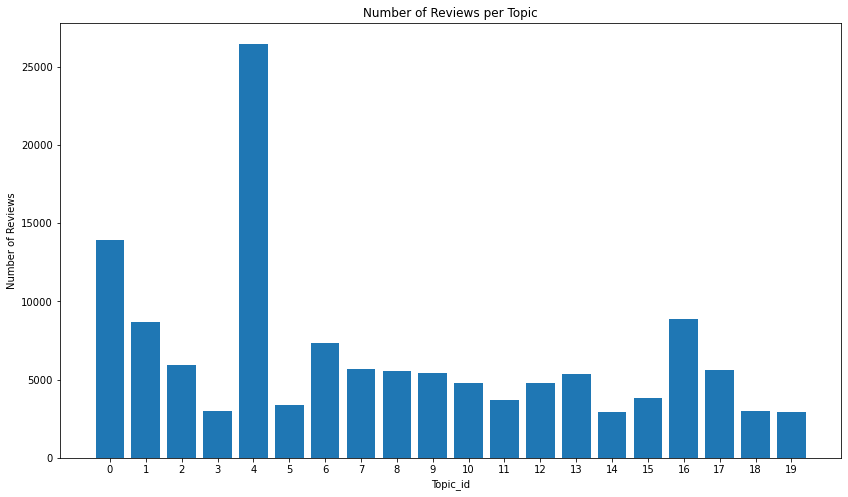

In [24]:
plt.figure(figsize=(14,8))
plt.bar(np.arange(0,components_count), height = np.bincount(resort_top))
plt.xlabel('Topic_id')
plt.ylabel('Number of Reviews')
plt.xticks(np.arange(0,components_count))
plt.title('Number of Reviews per Topic');

In [25]:
for sent_i in np.argsort(topic_distr[:,11])[-10:]:
    
    print(df.iloc[sent_i,1])
    print("-"*30)

Definatley coming back for more.
------------------------------
Would come back.
------------------------------
Not coming back!
------------------------------
Would I come back…no.
------------------------------
What would it take for me to come back ?
------------------------------
If I come back I will take my offroad jeep.
------------------------------
I will definitly come back again.
------------------------------
Will I come back?
------------------------------
Will not be coming back.
------------------------------
We will be coming back.
------------------------------


In [26]:
# normalize the weights
topics = normalize(topic_distr, norm='l1', axis=1, copy=True, return_norm=False)

topics_df  = pd.DataFrame(data=topics)

In [27]:
df_topics = pd.merge(df, topics_df, left_index=True, right_index=True)

In [28]:
df_topics.head()

,rev_id,sentence,lem_sent_token,lem_sent_text,0,1,2,3,4,5,...,10,11,12,13,14,15,16,17,18,19
0,0,I'm glad our family experienced Squaw but I wo...,"[i, 'm, glad, our, family, experience, squaw, ...",i 'm glad our family experience squaw but i wo...,0.00000,0.00000,0.000000,0.000000,0.438666,0.00000,...,0.000000,0.035169,0.000000,0.001622,0.000000,0.009287,0.000000,0.0,0.000000,0.515256
1,0,Here is a list of cons in detail: \n1.,"[here, be, a, list, of, con, in, detail, :, 1, .]",here be a list of con in detail : 1 .,0.04973,0.14709,0.002256,0.008267,0.206246,0.10508,...,0.000000,0.003968,0.090090,0.068413,0.000000,0.000000,0.136429,0.0,0.037268,0.000196
2,0,The staff were moody which is odd for an expen...,"[the, staff, be, moody, which, be, odd, for, a...",the staff be moody which be odd for an expensi...,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.544505,0.000000,0.067645,0.0,0.000000,0.000000
3,0,2.,"[2, .]",2 .,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,0,The on hill ski staff had the worst ego's.,"[the, on, hill, ski, staff, have, the, bad, eg...",the on hill ski staff have the bad ego 's .,0.00000,0.00000,0.010784,0.000000,0.094695,0.00000,...,0.002175,0.000000,0.016007,0.000000,0.604578,0.000000,0.070819,0.0,0.022008,0.000000


In [29]:
df_topics['polarity'] = [TextBlob(sent).sentiment[0] for sent in df_topics['sentence']]

In [30]:
df_topics['subjectivity'] = [TextBlob(sent).sentiment[1] for sent in df_topics['sentence']]

In [31]:
df_topics['sent_score'] = df_topics['polarity'] * df_topics['subjectivity']

In [33]:
with open('filtered_sent_sentiment_score.pkl', 'wb') as picklefile:
    pickle.dump(df_topics, picklefile)

# TSNE

In [35]:
topic_distr_10k = topic_distr[-10000:,:]

In [36]:
doc_plot = TSNE(verbose=1, metric="cosine").fit_transform(topic_distr_10k)

/Users/yefeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.000s...
[t-SNE] Computed neighbors for 10000 samples in 2.563s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.002064
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.633453
[t-SNE] KL divergence after 1000 iterations: 1.089292


In [37]:
rev_max_top = np.argmax(topic_distr_10k, axis=1)

In [38]:
topics = list(range(len(model.components_)))

In [39]:
def scatter(x, colors):
    palette = np.array(sns.color_palette("hls", components_count))

    f = plt.figure(figsize=(16, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    txts = []
    for i in range(components_count):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    
    plt.title(f'TSNE Plot with {components_count} topics', size=18)

    return f, ax, sc, txts

/var/folders/gz/42dtxd_57pq3_fymnggvsjfm0000gn/T/ipykernel_22886/1245822667.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=palette[colors.astype(np.int)])


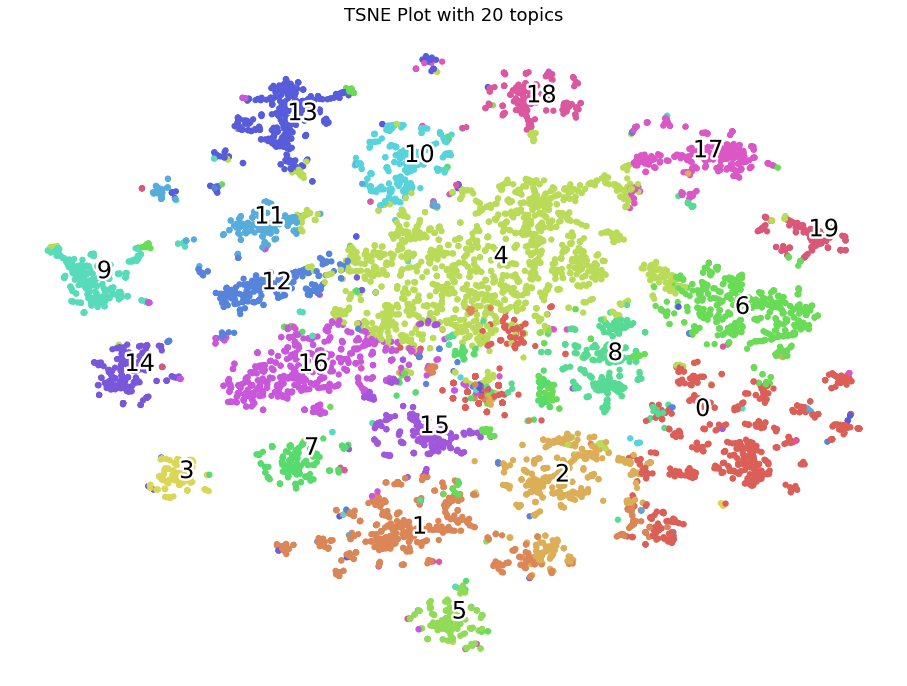

In [40]:
scatter(doc_plot,rev_max_top);